In [1]:
import pandas as pd
import numpy as np 

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv('time_series_covid19_deaths_global.csv')
df = df.rename(columns={'Country/Region': 'Pais'})
df = df.groupby('Pais').agg(np.sum)
# df = df.sort_values('5/11/20', ascending=False)
# df[df['Province/State'].notnull()][:50]
# df[df['Country/Region'] == 'France']
df = df.iloc[:,2:]
# df

In [2]:
tam = len(df.columns)
df1 = df.iloc[:,1:tam]
df1.columns = list(range(0,tam-1))
df2 = df.iloc[:,0:tam-1]
df2.columns = list(range(0,tam-1))
df3 = df1 - df2
df3.columns = df.columns[1:]
# df3.head(10)

In [3]:
df4 = df3.copy()
for x in df3.index:
    # print(x)
    for c in range(0,tam):
        # print(c)
        if c >= 7:
            # print(f'{df.columns[c]:<15} {df3.loc[x][c-7:c].mean():10,.0f}')
            df4.at[x, df.columns[c]] = df3.loc[x][c-7:c].mean()
# df4 = df4.sort_values('5/11/20', ascending=False)
# df4.iloc[:10,-14:]

In [4]:
q_pico = []
d_pico = []
for x in df4.index:
    # print(f'{x:<20} {df4.loc[x].max():5} {df4.columns[df4.loc[x].argmax()]}')
    q_pico.append(df4.loc[x].max())
    d_pico.append(df4.columns[df4.loc[x].argmax()])

In [5]:
df5 = pd.DataFrame(df4.iloc[:,-1], index=df4.index)
df5['Q_Pico'] = pd.Series(q_pico, index=df4.index)
df5['D_Pico'] = pd.Series(d_pico, index=df4.index)
df5.columns = ['Ult_7_Dias', 'Pico', 'Dia_do_Pico']
df5['Delta %'] = df5['Ult_7_Dias'] / df5['Pico'] - 1
df5 = df5.sort_values('Ult_7_Dias', ascending=False)
df5.head(10)

,Ult_7_Dias,Pico,Dia_do_Pico,Delta %
Pais,,,,
US,975,2201,4/18/20,-0.56
Brazil,975,975,5/29/20,0.00
Mexico,346,362,5/28/20,-0.04
United Kingdom,252,944,4/14/20,-0.73
India,179,179,5/29/20,0.00
Russia,160,160,5/29/20,0.00
Peru,122,137,5/27/20,-0.11
Canada,100,175,5/7/20,-0.43
Italy,87,814,4/2/20,-0.89


### Número de óbtidos por COVID-19
    Ranking 10 maiores países - considerando últ 7 dias
    Valores apresentam média diária de óbitos em 7 dias
    Atualizado com dados até 29/05/2020
    Data no formato mm/dd/aa
    Fonte: CSSE at Johns Hopkins University
    https://github.com/CSSEGISandData
    

In [6]:
q_pico_tot = df4.sum().max()
d_pico_tot = df4.sum().index[df4.sum().argmax()]
ult_7_dias_tot = df4.sum()[-1]
print('Data Pico Mundial: ', d_pico_tot)
print('Óbitos Pico Mundial: ', q_pico_tot)
print('Últimos 7 das: ', ult_7_dias_tot)
print(f'Delta {ult_7_dias_tot / q_pico_tot -1:.2f}')

Data Pico Mundial:  4/18/20
Óbitos Pico Mundial:  6964
Últimos 7 das:  3752
Delta -0.46


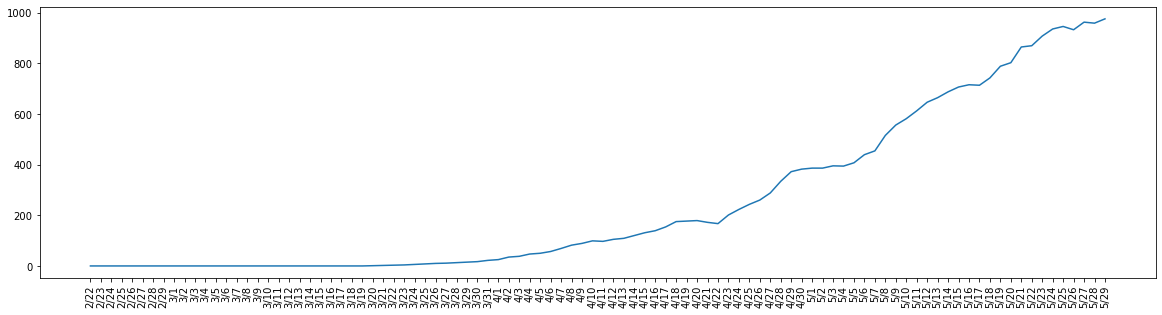

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
df_plt = df4.loc['Brazil'][30:]
# dates = pd.date_range('29-03-2020', periods=len(df_plt))

dates = []
for x in df_plt.index:
    if type(x) == str:
        pos = x.rfind('/')
        dates.append(x[:pos])
    else:
        dates.append(str(x.month) + '-' + str(x.day))
df_plt.index = dates
plt.plot(df_plt)
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)

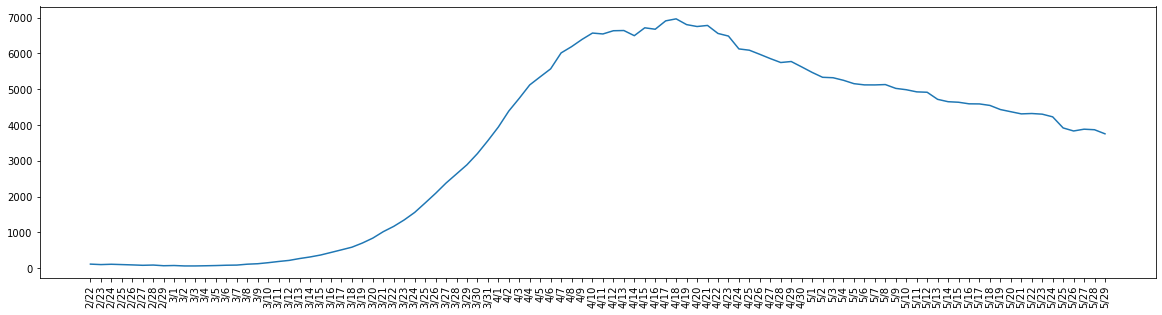

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
df_plt = df4.sum()[30:]
# dates = pd.date_range('29-03-2020', periods=len(df_plt))

dates = []
for x in df_plt.index:
    if type(x) == str:
        pos = x.rfind('/')
        dates.append(x[:pos])
    else:
        dates.append(str(x.month) + '-' + str(x.day))
df_plt.index = dates
plt.plot(df_plt)
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)